In [1]:
!pip install spacy

In [1]:
import pandas as pd
import spacy
import tensorflow as tf

In [2]:
disaster = pd.read_csv("train.csv")

In [3]:
disaster.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
len(disaster)

7613

In [4]:
!python -m spacy download en_core_web_sm -q

[+] Download and installation successful

2022-07-27 17:49:34.114442: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-07-27 17:49:34.114505: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-27 17:49:42.169466: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-07-27 17:49:42.169518: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-27 17:49:42.174572: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: LAPTOP-5R7882FN
2022-07-27 17:49:42.174701: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: LAPTOP-5R7882FN



You can now load the package via spacy.load('en_core_web_sm')


In [5]:
import en_core_web_sm
nlp = en_core_web_sm.load()

# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

In [6]:
# Remove all non alphanumeric characters except whitespaces
disaster["text_clean"] = disaster["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
disaster["text_clean"] = disaster["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [9]:
disaster

,id,keyword,location,text,target,text_clean
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...
...,...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,giant crane hold bridge collapse nearby home h...
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,ariaahrary thetawniest control wild fire calif...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,m194 0104 utc5 km s volcano hawaii httptcozdto...
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,police investigate ebike collide car little po...


In [13]:
disaster.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [16]:
import numpy as np
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 5000, oov_token= "<OOV>") # instanciate the tokenizer
tokenizer.fit_on_texts(disaster.text_clean)
disaster["text_encoded"] = tokenizer.texts_to_sequences(disaster.text_clean)

In [17]:
disaster.head()

,id,keyword,location,text,target,text_clean,text_encoded
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive,"[3654, 413, 173, 1382, 1941]"
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,"[119, 4, 162, 512, 1, 1, 1017]"
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...,"[1383, 445, 1704, 324, 1, 293, 188, 1704, 324,..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...,"[2299, 8, 2300, 69, 188, 281, 36]"
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got send photo ruby alaska smoke wildfire pour...,"[259, 181, 123, 1, 1705, 174, 69, 2301, 112]"


In [18]:
disaster_pad = tf.keras.preprocessing.sequence.pad_sequences(disaster.text_encoded, padding="post")

In [28]:
maxlen = disaster_pad.shape[1]

In [29]:
from sklearn.model_selection import train_test_split
# Train Test Split
xtrain, xval, ytrain, yval = train_test_split(disaster_pad,disaster.target, test_size=0.2, stratify=disaster.target)

In [30]:
train = tf.data.Dataset.from_tensor_slices((xtrain, ytrain))
val = tf.data.Dataset.from_tensor_slices((xval, yval))

In [31]:
train_batch = train.shuffle(len(train)).batch(64)
val_batch = val.shuffle(len(val)).batch(64)

In [32]:
 # Regardons un batch 
for tweet, target in train_batch.take(1):
    print(tweet, target)

tf.Tensor(
[[1279  767  258 ...    0    0    0]
 [   1    1  776 ...    0    0    0]
 [ 300  166 1670 ...    0    0    0]
 ...
 [   1    6  523 ...    0    0    0]
 [ 119    4    5 ...    0    0    0]
 [ 227   18  272 ...    0    0    0]], shape=(64, 25), dtype=int32) tf.Tensor(
[1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1], shape=(64,), dtype=int64)


 ## create a model in order to train an embedding!

In [33]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.GlobalAveragePooling1D(),

                  # Couche Dense classique
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            320064    
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 322,689
Trainable params: 322,689
Non-trainable params: 0
__________________________________________________

In [35]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=["Accuracy"])

In [39]:
history = model.fit(train_batch, 
                    epochs=2, 
                    validation_data=val_batch)

Epoch 1/2
96/96 [==============================] - 1s 7ms/step - loss: 0.1643 - Accuracy: 0.9415 - val_loss: 0.6883 - val_Accuracy: 0.7577
Epoch 2/2
96/96 [==============================] - 1s 10ms/step - loss: 0.1545 - Accuracy: 0.9429 - val_loss: 0.6718 - val_Accuracy: 0.7892


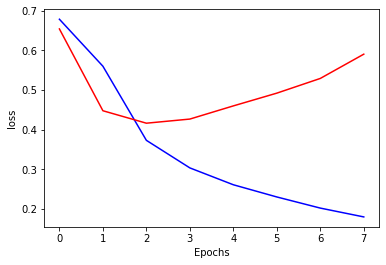

In [37]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

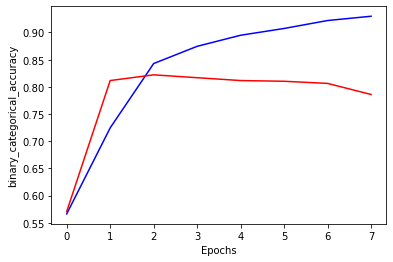

In [38]:
# Visualization of accuracy training 
plt.plot(history.history["Accuracy"], color="b")
plt.plot(history.history["val_Accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

## SimpleRNN

In [88]:
vocab_size = tokenizer.num_words
model = tf.keras.Sequential([
                  # Word Embedding layer           
                  tf.keras.layers.Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # Gobal average pooling
                  tf.keras.layers.SimpleRNN(units=64, return_sequences=True), # maintains the sequential nature
                  tf.keras.layers.SimpleRNN(units=32, return_sequences=False), # returns the last output
                  # Dense layers once the data is flat
                  # tf.keras.layers.Dense(16, activation='relu'),
                  # tf.keras.layers.Dense(8, activation='relu'),

                  # output layer with as many neurons as the number of classes
                  # for the target variable and softmax activation
                  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [89]:
optimizer= tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [90]:
history = model.fit(train_batch, 
                    epochs=10, 
                    validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 3s 15ms/step - loss: 0.5720 - binary_accuracy: 0.7049 - val_loss: 0.4638 - val_binary_accuracy: 0.7945
Epoch 2/10
96/96 [==============================] - 1s 11ms/step - loss: 0.4293 - binary_accuracy: 0.8205 - val_loss: 0.5253 - val_binary_accuracy: 0.7472
Epoch 3/10
96/96 [==============================] - 1s 11ms/step - loss: 0.3555 - binary_accuracy: 0.8594 - val_loss: 0.4992 - val_binary_accuracy: 0.7958
Epoch 4/10
96/96 [==============================] - 1s 11ms/step - loss: 0.2907 - binary_accuracy: 0.8847 - val_loss: 0.5556 - val_binary_accuracy: 0.7787
Epoch 5/10
96/96 [==============================] - 1s 11ms/step - loss: 0.2348 - binary_accuracy: 0.9102 - val_loss: 0.5939 - val_binary_accuracy: 0.7754
Epoch 6/10
96/96 [==============================] - 1s 12ms/step - loss: 0.1886 - binary_accuracy: 0.9304 - val_loss: 0.7134 - val_binary_accuracy: 0.7518
Epoch 7/10
96/96 [==============================] - 1s 11ms/step - los

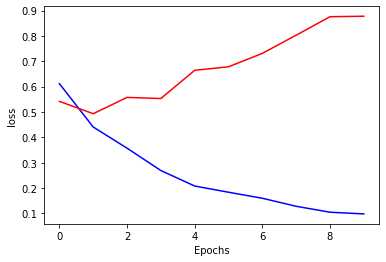

In [50]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history.history["loss"], color="b")
plt.plot(history.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

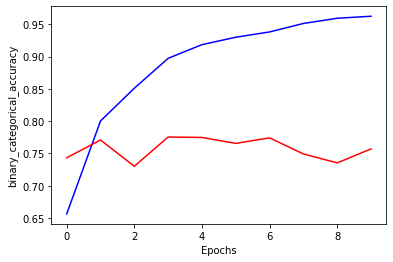

In [51]:
# Visualization of accuracy training 
plt.plot(history.history["binary_accuracy"], color="b")
plt.plot(history.history["val_binary_accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [137]:
model.save("model_simpleRNN.h5")

## GRU

In [51]:
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, GRU, LSTM

vocab_size = len(tokenizer.word_index)
model_gru = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  GRU(units=64, return_sequences=True), # maintains the sequential nature
                  GRU(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid")
])

In [52]:
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 25, 64)            1706368   
                                                                 
 gru_2 (GRU)                 (None, 25, 64)            24960     
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 8)                 136       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,741,409
Trainable params: 1,741,409
No

In [53]:
optimizer= tf.keras.optimizers.Adam()

model_gru.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [54]:
history_gru = model_gru.fit(train_batch, 
                            epochs=10, 
                            validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 18s 87ms/step - loss: 0.6845 - binary_accuracy: 0.5683 - val_loss: 0.6821 - val_binary_accuracy: 0.5706
Epoch 2/10
96/96 [==============================] - 6s 67ms/step - loss: 0.5457 - binary_accuracy: 0.7223 - val_loss: 0.4651 - val_binary_accuracy: 0.7886
Epoch 3/10
96/96 [==============================] - 7s 68ms/step - loss: 0.3653 - binary_accuracy: 0.8553 - val_loss: 0.4350 - val_binary_accuracy: 0.8096
Epoch 4/10
96/96 [==============================] - 8s 81ms/step - loss: 0.2887 - binary_accuracy: 0.8970 - val_loss: 0.4787 - val_binary_accuracy: 0.8011
Epoch 5/10
96/96 [==============================] - 9s 92ms/step - loss: 0.2386 - binary_accuracy: 0.9181 - val_loss: 0.5145 - val_binary_accuracy: 0.7899
Epoch 6/10
96/96 [==============================] - 7s 72ms/step - loss: 0.2091 - binary_accuracy: 0.9302 - val_loss: 0.6354 - val_binary_accuracy: 0.7748
Epoch 7/10
96/96 [==============================] - 7s 73ms/step - lo

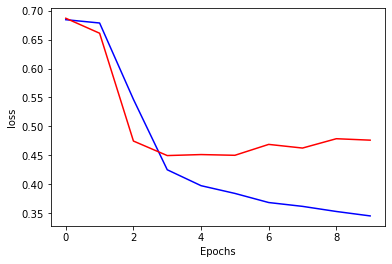

In [56]:
import matplotlib.pyplot as plt

# Visualization of the training process on the loss function 
plt.plot(history_gru.history["loss"], color="b")
plt.plot(history_gru.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

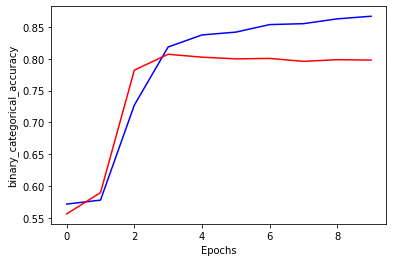

In [57]:
# Visualization of accuracy training 
plt.plot(history_gru.history["binary_accuracy"], color="b")
plt.plot(history_gru.history["val_binary_accuracy"], color="r")
plt.ylabel("binary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [144]:
model_gru.save("model_gru.h5")

In [49]:
from tensorflow.keras.layers import LSTM

vocab_size = len(tokenizer.word_index)
model_lstm = tf.keras.Sequential([
                  Embedding(vocab_size+1, 64, input_shape=[tweet.shape[1],],name="embedding"),
                  # LSTM(units=64, return_sequences=True), # maintains the sequential nature
                  LSTM(units=32, return_sequences=False), # returns the last output
                  Dense(16, activation='relu'),
                  Dense(8, activation='relu'),

                  Dense(1, activation="sigmoid", name="last")
])

NameError: name 'Embedding' is not defined

In [104]:
model_lstm.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (Embedding)            (None, 25, 64)            1706368   
                                                                 
 lstm_6 (LSTM)               (None, 32)                12416     
                                                                 
 last (Dense)                (None, 1)                 33        
                                                                 
Total params: 1,718,817
Trainable params: 1,718,817
Non-trainable params: 0
_________________________________________________________________


In [105]:
optimizer= tf.keras.optimizers.Adam()

model_lstm.compile(optimizer=optimizer,
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [106]:
history_lstm = model_lstm.fit(train_batch, 
                              epochs=10,
                              validation_data=val_batch)

Epoch 1/10
96/96 [==============================] - 7s 41ms/step - loss: 0.6068 - binary_accuracy: 0.6599 - val_loss: 0.4661 - val_binary_accuracy: 0.7965
Epoch 2/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4396 - binary_accuracy: 0.8126 - val_loss: 0.4446 - val_binary_accuracy: 0.8083
Epoch 3/10
96/96 [==============================] - 3s 35ms/step - loss: 0.4008 - binary_accuracy: 0.8328 - val_loss: 0.4635 - val_binary_accuracy: 0.8030
Epoch 4/10
96/96 [==============================] - 4s 37ms/step - loss: 0.3841 - binary_accuracy: 0.8407 - val_loss: 0.4717 - val_binary_accuracy: 0.7846
Epoch 5/10
96/96 [==============================] - 4s 36ms/step - loss: 0.3736 - binary_accuracy: 0.8455 - val_loss: 0.4518 - val_binary_accuracy: 0.8076
Epoch 6/10
96/96 [==============================] - 3s 36ms/step - loss: 0.3672 - binary_accuracy: 0.8486 - val_loss: 0.4712 - val_binary_accuracy: 0.8011
Epoch 7/10
96/96 [==============================] - 3s 36ms/step - los

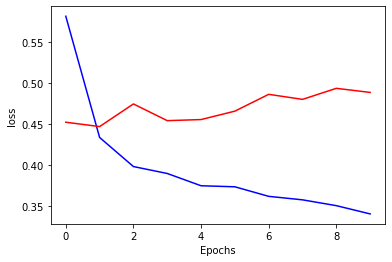

In [95]:
# Visualization of the training process on the loss function 
plt.plot(history_lstm.history["loss"], color="b")
plt.plot(history_lstm.history["val_loss"], color="r")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.show()

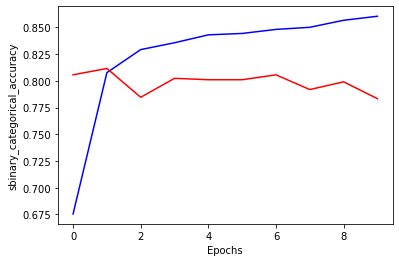

In [97]:
# Visualization of accuracy training 
plt.plot(history_lstm.history["binary_accuracy"], color="b")
plt.plot(history_lstm.history["val_binary_accuracy"], color="r")
plt.ylabel("sbinary_categorical_accuracy")
plt.xlabel("Epochs")
plt.show()

In [151]:
model_lstm.save("model_lstm.h5")

## predict the target test

In [40]:
df_test = pd.read_csv("test.csv")

In [41]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [25]:
len(df_test)

3263

In [42]:
# Remove all non alphanumeric characters except whitespaces
df_test["text_clean"] = df_test["text"].apply(lambda x:''.join(ch for ch in x if ch.isalnum() or ch==" "))
# remove double spaces and spaces at the beginning and end of strings
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: x.replace(" +"," ").lower().strip())
# remove stop words and replace everyword with their lemma
df_test["text_clean"] = df_test["text_clean"].apply(lambda x: " ".join([token.lemma_ for token in nlp(x) if (token.lemma_ not in STOP_WORDS) & (token.text not in STOP_WORDS)]))

In [43]:
tokenizer.fit_on_texts(df_test.text_clean)
df_test["text_encoded"] = tokenizer.texts_to_sequences(df_test.text_clean)

df_test_pad = tf.keras.preprocessing.sequence.pad_sequences(df_test.text_encoded, padding="post",maxlen=maxlen)

In [56]:
#Let's make predictions on the first batch of the test set
# test_input, test_target = next(iter(test_batch))

pred = model_gru.predict(df_test_pad)
pred
# we get one porbability for each class

102/102 [==============================] - 3s 10ms/step


array([[0.07914533],
       [0.12883697],
       [0.09512404],
       ...,
       [0.88109475],
       [0.06364774],
       [0.29646468]], dtype=float32)

In [32]:
# let's convert these predictions into classes
len(pred)

3263

In [57]:
df_predict = pd.DataFrame(pred, columns=['proba'])
df_predict.head()

,proba
0,0.079145
1,0.128837
2,0.095124
3,0.218995
4,0.207133


In [58]:
df_predict["target"] = df_predict["proba"].apply(lambda x : 0 if x <0.9
                                    else 1)
df_predict

,proba,target
0,0.079145,0
1,0.128837,0
2,0.095124,0
3,0.218995,0
4,0.207133,0
...,...,...
3258,0.996122,1
3259,0.527260,0
3260,0.881095,0
3261,0.063648,0


In [48]:
len(pred_bin)

2

In [59]:
output = pd.DataFrame({'id': df_test["id"],
                       'target': df_predict["target"]  })
output.to_csv('submission_python_gru.csv', index=False)